In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")



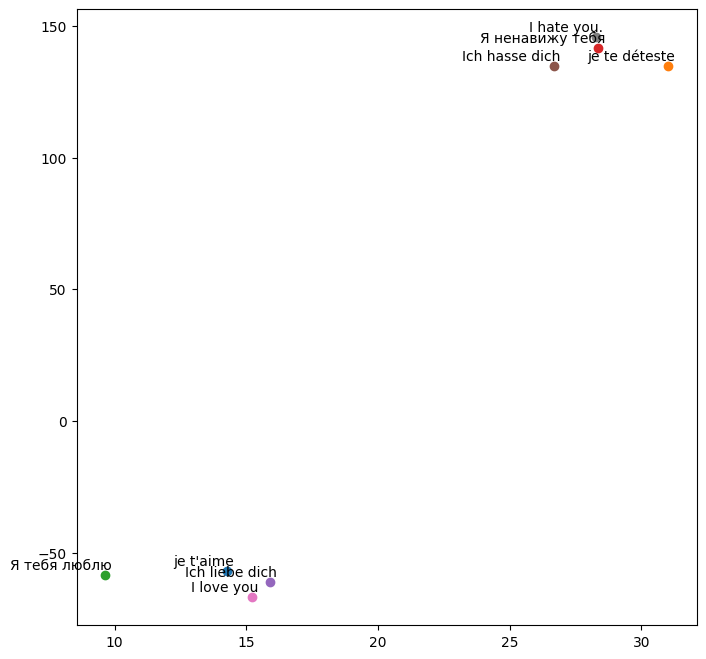

In [54]:
import torch 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



inputs = [
    "je t'aime", "je te déteste", "Я тебя люблю",
    "Я ненавижу тебя", "Ich liebe dich",
    "Ich hasse dich", "I love you", "I hate you."
]

embeddings = []
for i in inputs:
    embeddings.append(model.encode(i))

embeddings = np.array(embeddings)
tsne_model = TSNE(perplexity=2, n_components=2, init='pca',  random_state=42, metric="cosine")
new_values = tsne_model.fit_transform(embeddings)

new_values = tsne_model.fit_transform(embeddings)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
    
plt.figure(figsize=(8, 8)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(inputs[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()
